# PyTorch Computer Vision Using MNIST Dataset



In [ ]:
# Check for GPU
!nvidia-smi

Fri Oct 25 07:22:00 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Import torch
import torch
print(torch.__version__)
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.5.0+cu121


'cuda'

## Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [ ]:
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

train_data = datasets.MNIST(
    root = 'data'
    ,train = True
    ,download = True
    ,transform = (transforms.ToTensor())
)

test_data = datasets.MNIST(
    root = 'data'
    ,train = False
    ,download = True
    ,transform = (transforms.ToTensor())
)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 13.5MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 407kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.76MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.23MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
image, label = train_data[0]
image.shape, label

(torch.Size([1, 28, 28]), 5)

In [ ]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [ ]:
classes = train_data.classes
classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## Visualize at least 5 different samples of the MNIST training dataset.

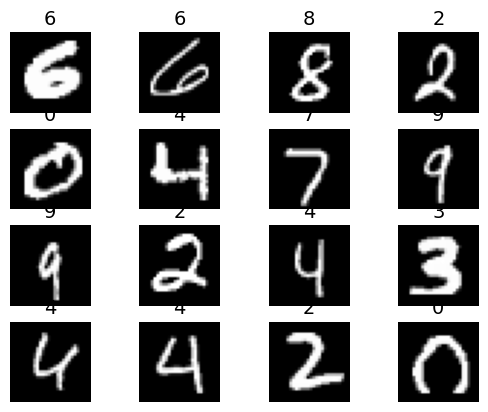

In [ ]:
import matplotlib.pyplot as plt
torch.manual_seed(42)
cols = rows = 4
for i in range(1,cols * rows + 1):
    sample_idx = torch.randint(0,len(train_data),size = [1]).item()
    img,label = train_data[sample_idx]
    plt.subplot(rows,cols,i)
    plt.imshow(img.squeeze(),cmap = "gray")
    plt.title(str(label),fontsize = 14)
    plt.axis(False)


## Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [ ]:
train_dataloader = DataLoader(train_data,batch_size=32,shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=32,shuffle=False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7d8d2cc33640>,
 <torch.utils.data.dataloader.DataLoader at 0x7d8d49ab52d0>)

In [ ]:
print(f"Dataloaders: {train_dataloader,test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of 32")
print(f"Length of test dataloader: {len(test_dataloader)} batches of 32")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7d8d2cc33640>, <torch.utils.data.dataloader.DataLoader object at 0x7d8d49ab52d0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [ ]:
train_features_batch,train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 9, label size: torch.Size([])


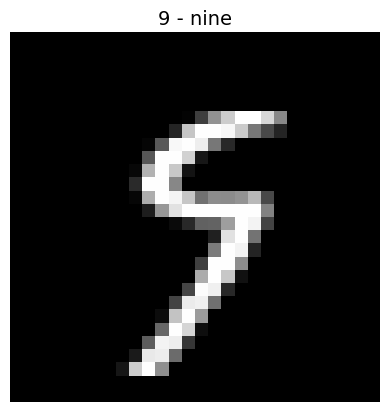

In [ ]:
torch.manual_seed(42)
sample_idx = torch.randint(0,len(train_features_batch),size = [1]).item()
img,label = train_features_batch[sample_idx],train_labels_batch[sample_idx]
plt.imshow(img.squeeze(),cmap = "gray")
plt.title(classes[label],fontsize = 14)
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## Implement TinyVGG model

In [ ]:
from torch import nn
class MinstModelV2(torch.nn.Module):
  def __init__(self, input_shape:int , hidden_units:int, output_shape: int):
    super().__init__()
    self.block1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,out_channels = hidden_units, kernel_size = 3,stride = 1,padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,out_channels = hidden_units, kernel_size = 3,stride = 1,padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )

    self.block2 = nn.Sequential(
    nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3,stride = 1,padding = 1),
    nn.ReLU(),
    nn.Conv2d(in_channels = hidden_units,out_channels = hidden_units, kernel_size = 3,stride = 1,padding = 1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size = 2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units * 7 * 7,out_features = output_shape)
    )
  def forward (self,x:torch.Tensor):
    x = self.block1(x)
    x = self.block2(x)
    x = self.classifier(x)
    return x

torch.manual_seed(42)
model = MinstModelV2(input_shape = 1,hidden_units = 10,output_shape = len(classes)).to(device)
model

MinstModelV2(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
device

'cuda'

In [ ]:
torch.manual_seed(42)
x_dummy = torch.rand(size=(1, 28, 28)).unsqueeze(dim=0).to(device)
model(x_dummy)

tensor([[ 0.0337, -0.0691,  0.0611, -0.0388, -0.0057,  0.0187, -0.0006, -0.0126,
          0.0253,  0.0020]], device='cuda:0', grad_fn=<AddmmBackward0>)

## Train the model for 5 epochs on CPU and GPU and see how long it takes on each.

In [ ]:
%%time
from tqdm.auto import tqdm

model_cpu = MinstModelV2(input_shape = 1,hidden_units = 10,output_shape = len(classes)).to("cpu")
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_cpu.parameters(),lr = 0.1)
epochs = 5

for epoch in tqdm(range(epochs)):

  print(f"Epoch: {epoch}\n---------")
  train_loss = 0

  for batch, (x,y) in enumerate(train_dataloader):
    model_cpu.train()
    x,y = x.to("cpu"),y.to("cpu")
    y_pred = model_cpu(x)
    loss = loss_fn(y_pred,y)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(train_dataloader)
  test_loss = 0
  model_cpu.eval()

  with torch.inference_mode():
    for batch ,(x_test,y_test) in enumerate(test_dataloader):
      x_test,y_test = x_test.to("cpu"),y_test.to("cpu")
      test_pred = model_cpu(x_test)
      loss = loss_fn(test_pred,y_test)
      test_loss +=loss
    test_loss /= len(test_dataloader)

  print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss:.3f}")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Epoch: 0 | Loss: 0.277 | Test loss: 0.071
Epoch: 1
---------
Epoch: 1 | Loss: 0.076 | Test loss: 0.066
Epoch: 2
---------
Epoch: 2 | Loss: 0.058 | Test loss: 0.045
Epoch: 3
---------
Epoch: 3 | Loss: 0.048 | Test loss: 0.042
Epoch: 4
---------
Epoch: 4 | Loss: 0.041 | Test loss: 0.046
CPU times: user 3min 41s, sys: 1.58 s, total: 3min 43s
Wall time: 4min 2s


In [ ]:
%%time
from tqdm.auto import tqdm
device = "cuda" if torch.cuda.is_available() else "cpu"
model_gpu = MinstModelV2(input_shape = 1,hidden_units = 10,output_shape = len(classes)).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_gpu.parameters(),lr = 0.1)
epochs = 5

for epoch in tqdm(range(epochs)):

  print(f"Epoch: {epoch}\n---------")
  train_loss = 0

  for batch, (x,y) in enumerate(train_dataloader):
    model_cpu.train()
    x,y = x.to(device),y.to(device)
    y_pred = model_gpu(x)
    loss = loss_fn(y_pred,y)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(train_dataloader)
  test_loss = 0
  model_gpu.eval()

  with torch.inference_mode():
    for batch ,(x_test,y_test) in  enumerate(test_dataloader):
      x_test,y_test = x_test.to(device),y_test.to(device)
      test_pred = model_gpu(x_test)
      loss = loss_fn(test_pred,y_test)
      test_loss +=loss
    test_loss /= len(test_dataloader)

  print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss:.3f}")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Epoch: 0 | Loss: 0.264 | Test loss: 0.059
Epoch: 1
---------
Epoch: 1 | Loss: 0.064 | Test loss: 0.045
Epoch: 2
---------
Epoch: 2 | Loss: 0.050 | Test loss: 0.037
Epoch: 3
---------
Epoch: 3 | Loss: 0.042 | Test loss: 0.035
Epoch: 4
---------
Epoch: 4 | Loss: 0.037 | Test loss: 0.036
CPU times: user 1min 4s, sys: 508 ms, total: 1min 4s
Wall time: 1min 10s


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [ ]:
pred_logits = model_gpu(test_data[0][0].unsqueeze(dim=0).to(device))
pred_logits
pred_labels = torch.softmax(pred_logits,dim=1).argmax(dim=1)
pred_labels


tensor([7], device='cuda:0')

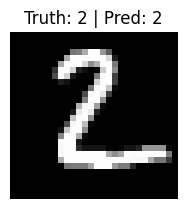

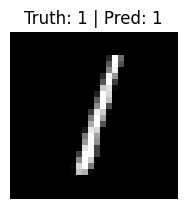

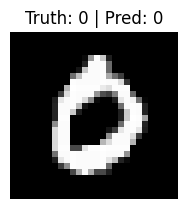

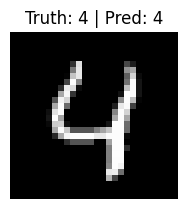

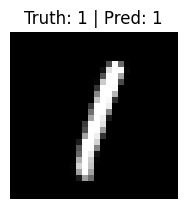

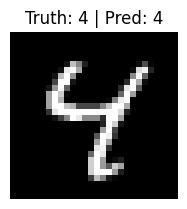

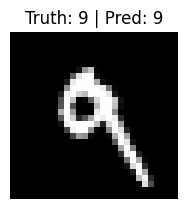

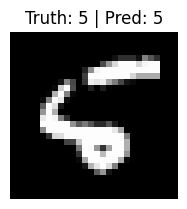

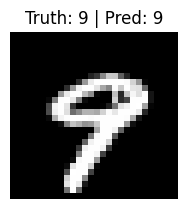

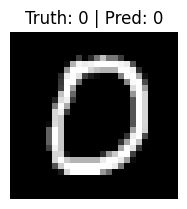

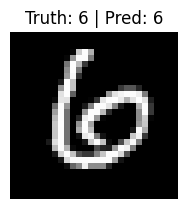

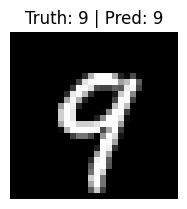

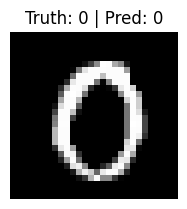

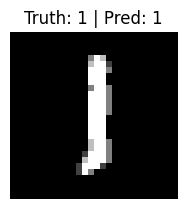

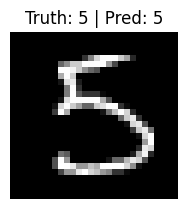

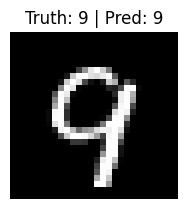

In [ ]:
import matplotlib.pyplot as plt
torch.manual_seed(42)
cols = rows = 4
for i in range(1,cols * rows + 1):
    img,label = test_data[i]
    pred_logits = model_gpu(img.unsqueeze(dim=0).to(device))
    pred_labels = torch.softmax(pred_logits,dim=1).argmax(dim=1)
    plt.figure(figsize=(10,10))
    plt.subplot(rows,cols,i)
    plt.imshow(img.squeeze(),cmap = "gray")
    plt.title(f"Truth: {label} | Pred: {pred_labels.cpu().item()}")
    plt.axis(False)


# 11. Make predictions across all test data


In [ ]:
from tqdm.auto import tqdm
model_gpu.eval()
y_preds = []
with torch.inference_mode():
  for batch, (X, y) in tqdm(enumerate(test_dataloader)):

    X, y = X.to(device), y.to(device)
    y_pred_logits = model_gpu(X)
    y_pred_labels = torch.softmax(y_pred_logits, dim=1)
    y_pred_labels = y_pred_labels.argmax(dim=1)
    y_preds.append(y_pred_labels.cpu())
  y_preds = torch.cat([pred.to('cpu') for pred in y_preds], dim=0)
  print("Final concatenated y_preds shape:", y_preds.shape)


0it [00:00, ?it/s]

Final concatenated y_preds shape: torch.Size([10000])


In [ ]:
test_data.targets[:10]


tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [ ]:
y_preds[:10]

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [ ]:
!pip install -q torchmetrics -U mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 19.9 MB/s eta 0:00:00


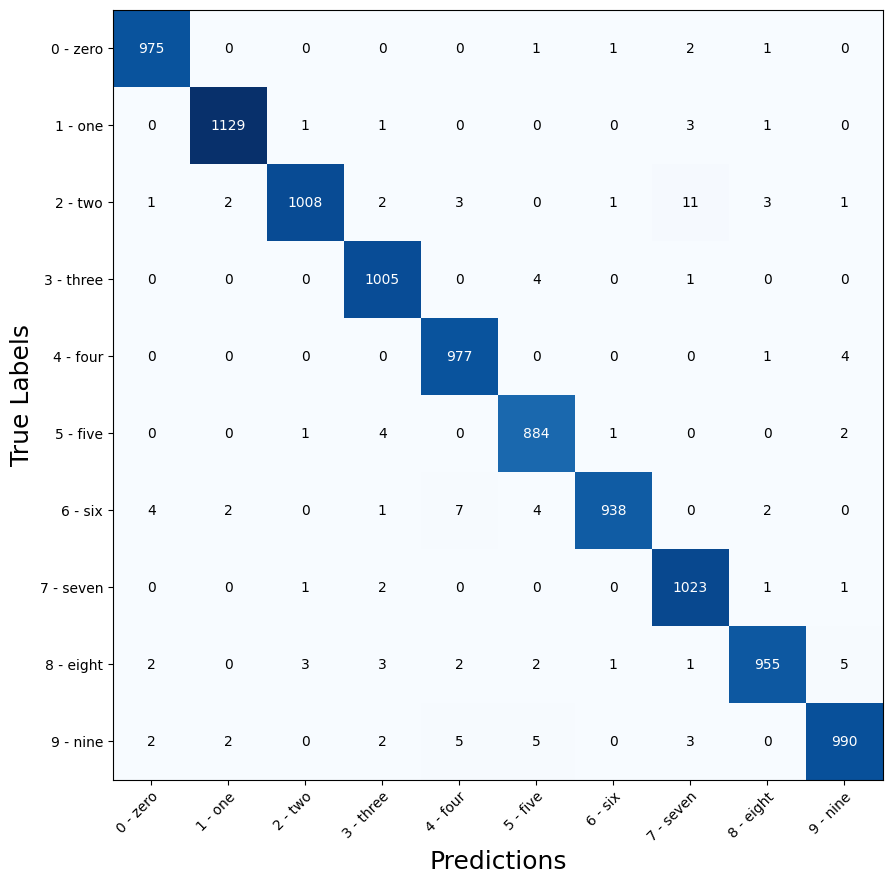

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes= 10, task="multiclass")
confmat_tensor = confmat(y_preds, test_data.targets)
fix, ax = plot_confusion_matrix(conf_mat = confmat_tensor.numpy(), figsize=(10, 10), class_names = classes, cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('True Labels', fontsize=18)
plt.show()

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?